# Домашнее задание № 2

### Выполнил Кузнецов С.И.

Загрузим датасет о ценах на дома в Бостоне.

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


Каждый дом - это вектор в 13-мерном пространстве. Написать код для подсчета скалярного произведения двух первых домов и датасета.

In [2]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2

**Решение:**

In [3]:
# Выведем первые 2 строки датасета
import pandas as pd
import numpy as np
boston_df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
boston_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [4]:
# Первый дом
x1

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [5]:
# Второй дом
x2

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

Для подсчета скалярного произведения воспользуемся функцией *dot()* из библиотеки *numpy* 

In [6]:
print('Скалярное произведение x1 и x2 равно {:.2f}'.format(np.dot(x1, x2)))

Скалярное произведение x1 и x2 равно 234704.86


Нарисовать два дома в 3-мерном пространстве (атрибуты выбрать самостоятельно)

**Решение:**

В качестве атрибутов выберем параметры "*AGE*", "*RAD*" и "*TAX*"

In [7]:
params = ['AGE', 'RAD', 'TAX']
x1_vec = boston_df[params].iloc[0]
x1_vec

AGE     65.2
RAD      1.0
TAX    296.0
Name: 0, dtype: float64

In [8]:
x2_vec = boston_df[params].iloc[1]
x2_vec

AGE     78.9
RAD      2.0
TAX    242.0
Name: 1, dtype: float64

Построим векторы, соответствующие первым двум домам

In [9]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

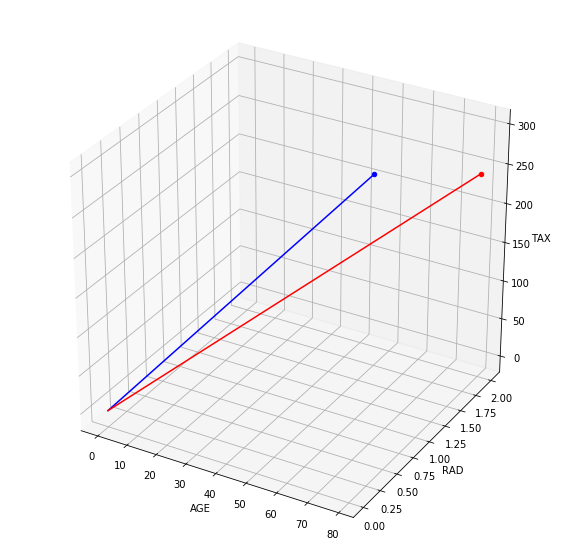

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

ax.plot([0, x1_vec[params[0]]], [0, x1_vec[params[1]]], [0, x1_vec[params[2]]], c='b')
ax.plot([0, x2_vec[params[0]]], [0, x2_vec[params[1]]], [0, x2_vec[params[2]]], c='r')

ax.scatter(x1_vec[params[0]], x1_vec[params[1]], x1_vec[params[2]], c='b', marker='o')
ax.scatter(x2_vec[params[0]], x2_vec[params[1]], x2_vec[params[2]], c='r', marker='o')

ax.set_xlabel(params[0])
ax.set_ylabel(params[1])
ax.set_zlabel(params[2])

plt.show()

Найти косинус угла между векторами x1 и x2

**Решение:**

Косинус угла между векторами ищем по формуле:
$$\cos(\vec{x}_1, \vec{x}_2)=\frac{\vec{x}_1\cdot\vec{x}_2}{|\vec{x}_1||\vec{x}_2|}$$

In [11]:
import math

In [12]:
cos_1_2 = np.dot(x1, x2)/math.sqrt(np.dot(x1, x1) * np.dot(x2, x2))
print('Косинус угла между векторами x1 и x2 равен {:.4f}'.format(cos_1_2))

Косинус угла между векторами x1 и x2 равен 0.9943


Найти расстояние между точками x1 и x2.

**Решение:**

Расстояние между точками ищем как длину разности векторов x1 и x2

In [13]:
dist_1_2 = math.sqrt(np.dot(x1 - x2, x1 - x2))
print('Расстояние между точками x1 и x2 равно {:.2f}'.format(dist_1_2))

Расстояние между точками x1 и x2 равно 58.96


# Задание повышенного уровня.

Задан объект в пространстве 2D. Изменить положение объекта (сместить по оси x на 300 пикселей, по оси y на 200 пикселей).

(-200, 200)

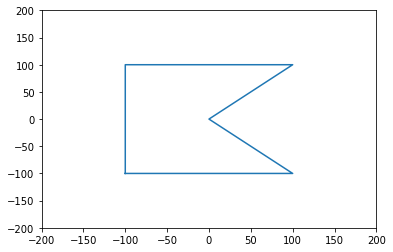

In [14]:
import numpy as np
import matplotlib.pyplot as plt

A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

**Решение:**

Построим матрицу сдвига

In [15]:
T_1 = np.array([
    [1, 0, 300],
    [0, 1, 200],
    [0, 0, 1]
])
print(T_1)

[[  1   0 300]
 [  0   1 200]
 [  0   0   1]]


Осуществим перемещение путем умножения матрицы *A* на матрицу сдвига

In [16]:
A_1 = np.transpose(np.dot(T_1, np.transpose(A)))
print(A_1)

[[200 100   1]
 [200 300   1]
 [400 300   1]
 [300 200   1]
 [400 100   1]
 [200 100   1]]


Построим смещенное изображение

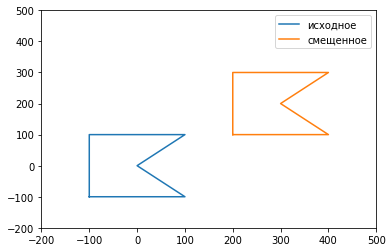

In [17]:
x = A[:,0]
y = A[:,1]

x_1 = A_1[:,0]
y_1 = A_1[:,1]

plt.plot(x, y)
plt.plot(x_1, y_1)
plt.ylim([-200, 500])
plt.xlim([-200, 500])

plt.legend(['исходное', 'смещенное'])

plt.show()

Уменьшить объект в два раза.

**Решение:**

Построим матрицу масштабирования

In [18]:
T_2 = np.array([
    [.5, 0, 0],
    [0, .5, 0],
    [0, 0, 1]
])
print(T_2)

[[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  1. ]]


Осуществим уменьшение путем умножения матрицы A на матрицу масштабирования

In [19]:
A_2 = np.transpose(np.dot(T_2, np.transpose(A)))
print(A_2)

[[-50. -50.   1.]
 [-50.  50.   1.]
 [ 50.  50.   1.]
 [  0.   0.   1.]
 [ 50. -50.   1.]
 [-50. -50.   1.]]


Построим уменьшенное изображение

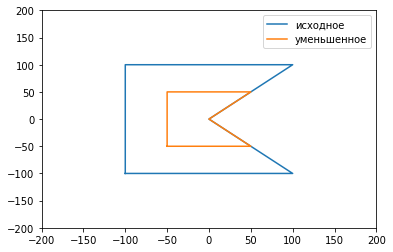

In [20]:
x = A[:,0]
y = A[:,1]

x_2 = A_2[:,0]
y_2 = A_2[:,1]

plt.plot(x, y)
plt.plot(x_2, y_2)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

plt.legend(['исходное', 'уменьшенное'])

plt.show()

Повернуть на 130 градусов.

**Решение:**

Построим матрицу поворота

In [21]:
from math import cos, sin, pi

ang = 13 * pi / 18 # Угол поворота в радианах

T_3 = np.array([
    [cos(ang), -sin(ang), 0],
    [sin(ang), cos(ang), 0],
    [0, 0, 1]
])
print(T_3)

[[-0.64278761 -0.76604444  0.        ]
 [ 0.76604444 -0.64278761  0.        ]
 [ 0.          0.          1.        ]]


Осуществим поворот путем умножения матрицы A на матрицу поворота

In [22]:
A_3 = np.transpose(np.dot(T_3, np.transpose(A)))
print(A_3)

[[ 140.88320528  -12.32568334    1.        ]
 [ -12.32568334 -140.88320528    1.        ]
 [-140.88320528   12.32568334    1.        ]
 [   0.            0.            1.        ]
 [  12.32568334  140.88320528    1.        ]
 [ 140.88320528  -12.32568334    1.        ]]


Построим повернутое изображение

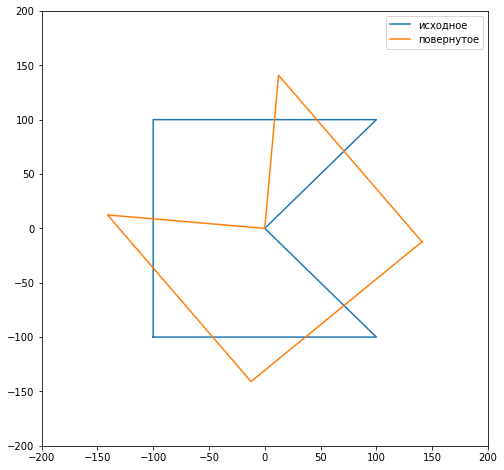

In [23]:
x = A[:,0]
y = A[:,1]

x_3 = A_3[:,0]
y_3 = A_3[:,1]

plt.figure(figsize = (8,8))  # Сделаем одинаковый масштаб по осям для наглядности

plt.plot(x, y)
plt.plot(x_3, y_3)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

plt.legend(['исходное', 'повернутое'])

plt.show()

Отразить объект относительно прямой y=x

**Решение:**

Построим матрицу отражения

In [24]:
T_4 = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]
])
print(T_4)

[[0 1 0]
 [1 0 0]
 [0 0 1]]


Осуществим отражение путем умножения матрицы A на матрицу отражения

In [25]:
A_4 = np.transpose(np.dot(T_4, np.transpose(A)))
print(A_4)

[[-100 -100    1]
 [ 100 -100    1]
 [ 100  100    1]
 [   0    0    1]
 [-100  100    1]
 [-100 -100    1]]


Построим отраженное изображение

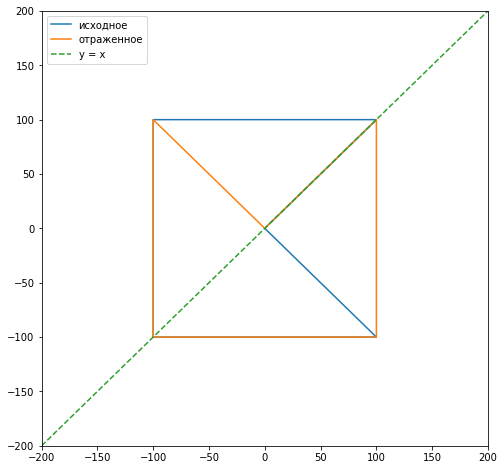

In [26]:
x = A[:,0]
y = A[:,1]

x_4 = A_4[:,0]
y_4 = A_4[:,1]

plt.figure(figsize = (8,8))  # Сделаем одинаковый масштаб по осям для наглядности

plt.plot(x, y)
plt.plot(x_4, y_4)
plt.plot([-200, 200], [-200, 200], linestyle = '--')
plt.ylim([-200, 200])
plt.xlim([-200, 200])

plt.legend(['исходное', 'отраженное', 'y = x'])

plt.show()